In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import xgboost as xgb
from sklearn.metrics import mean_absolute_error


In [2]:
color_pal = sns.color_palette("husl", 9)
color_pal

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [3]:
train_data_full = pd.read_csv("train.csv", parse_dates=["date"])
test_data_full = pd.read_csv("test.csv", parse_dates= ["date"])

train_data_full.head()
#test_data_full.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
train_data_full = train_data_full.set_index("date")
train_data_full = train_data_full.drop("id", axis = 1)

test_data_full = test_data_full.set_index("date")
test_data_full = test_data_full.drop("id", axis = 1).copy()

In [5]:
y_train = train_data_full["num_sold"]
X_train = train_data_full.drop("num_sold", axis = 1).copy()

X_train["Time Step"] = np.arange(len(X_train))

X_train.head()

,country,store,product,Time Step
date,,,,
2010-01-01,Canada,Discount Stickers,Holographic Goose,0
2010-01-01,Canada,Discount Stickers,Kaggle,1
2010-01-01,Canada,Discount Stickers,Kaggle Tiers,2
2010-01-01,Canada,Discount Stickers,Kerneler,3
2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,4


<AxesSubplot:title={'center':'Num of Stickers Sold per something'}, xlabel='date'>

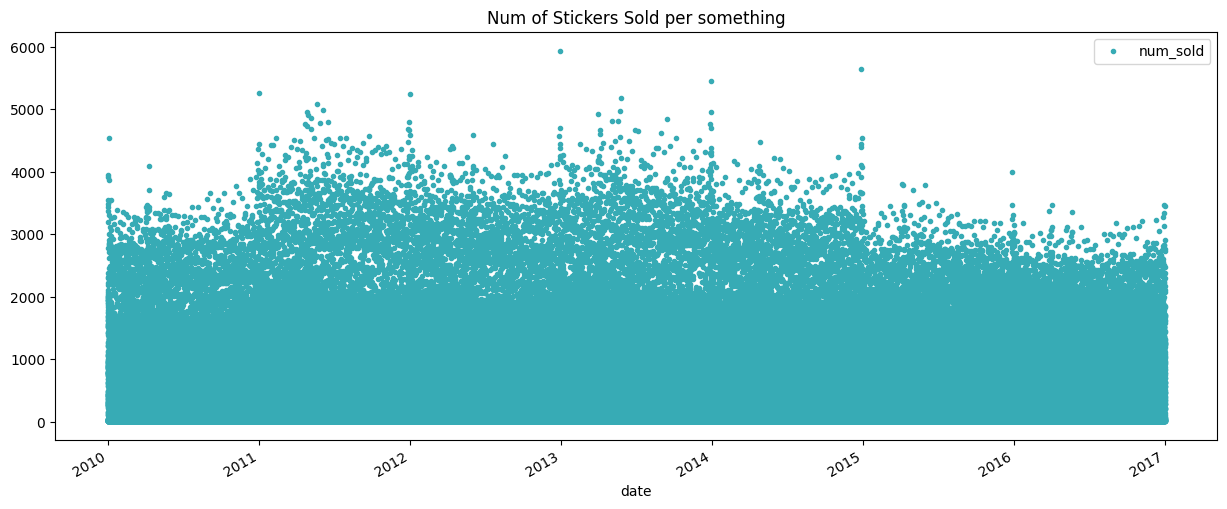

In [6]:
train_data_full.plot(style = ".", 
                     figsize=(15,6), 
                     color = color_pal[5], 
                     title = "Num of Stickers Sold per something")

In [7]:
print(train_data_full.shape)
train_data_full.isnull().sum()

(230130, 4)


country        0
store          0
product        0
num_sold    8871
dtype: int64

In [8]:
y_train

date
2010-01-01       NaN
2010-01-01     973.0
2010-01-01     906.0
2010-01-01     423.0
2010-01-01     491.0
               ...  
2016-12-31     466.0
2016-12-31    2907.0
2016-12-31    2299.0
2016-12-31    1242.0
2016-12-31    1622.0
Name: num_sold, Length: 230130, dtype: float64

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, train_size=0.8, random_state = 0, shuffle=False)
X_train.head()

,country,store,product,Time Step
date,,,,
2010-01-01,Canada,Discount Stickers,Holographic Goose,0
2010-01-01,Canada,Discount Stickers,Kaggle,1
2010-01-01,Canada,Discount Stickers,Kaggle Tiers,2
2010-01-01,Canada,Discount Stickers,Kerneler,3
2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,4


In [10]:
print("X_train stats in a day \n",X_train.iloc[X_train.index == "2010-01-06"].count())
print("\n y_train stats in a day \n", y_train.iloc[y_train.index == "2015-08-09"].count())

X_train stats in a day 
 country      90
store        90
product      90
Time Step    90
dtype: int64

 y_train stats in a day 
 0


In [11]:
uniques = [X_train[col].unique() for col in X_train.columns if col != "num_sold"]
uniques


[array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
       dtype=object),
 array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
       dtype=object),
 array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
        'Kerneler Dark Mode'], dtype=object),
 array([     0,      1,      2, ..., 184101, 184102, 184103])]

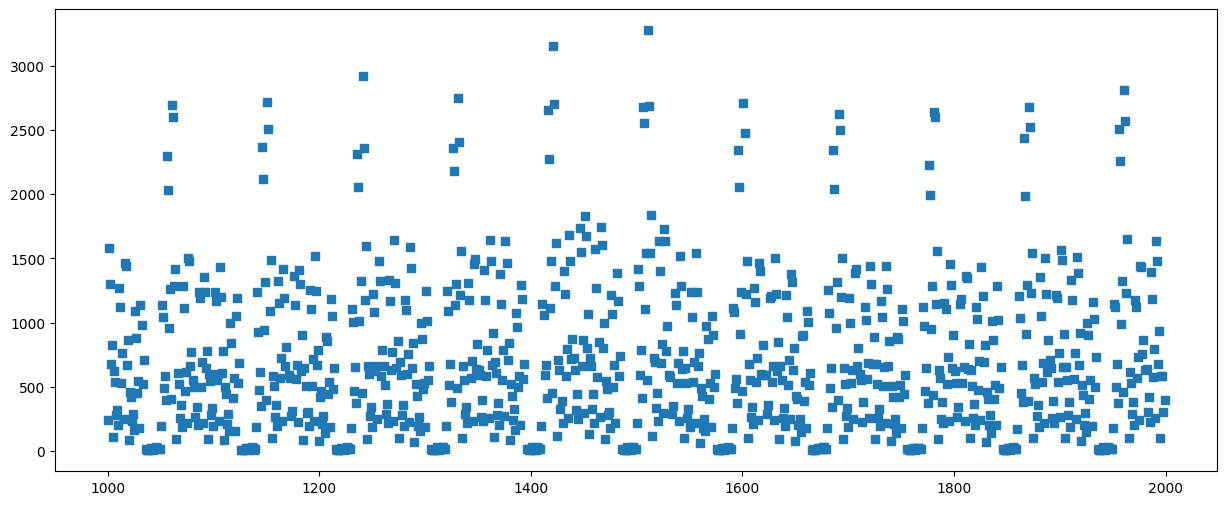

In [12]:
x = np.array(X_train["Time Step"])
y = np.array(y_train)

plt.figure(figsize= (15, 6))
plt.scatter(x[1000:2000],y[1000:2000], marker= ",")

In [13]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

target_impute = SimpleImputer()

#xx = X_train["Time Step"]

y_train = target_impute.fit_transform(y_train)

y_val = target_impute.transform(y_val)

In [ ]:
model = xgb.XGBRegressor()
model.fit([X_train.index, X_train["Time Step"]], y_train)

In [15]:
predictions = model.predict(X_val.index, [X_val["Time Step"]])

In [16]:
mae = mean_absolute_error(predictions, y_val)

print(mae)

462.8899375795656


In [17]:
y_val.mean()

684.6860294396056